# ILSVRC

- 이미지 인식, 분류 대회 (종료)
- histrory
  - AlexNet(2012)
    - CNN 기반 딥러닝 알고리즘
    - 딥러닝이 이미지 분류 대회에, 처음으로 등장
    - 이후로 거의다 딥러닝으로 페러다임이 변경
    - 이미지 인식은 곧 CNN이다 라는 정설이 마련되었다
  - GoogleLeNet( inception v2, 2014)
  - ResNet(2015, 인식오류 5%)
    - resNet-152(152층)
  - GoogleLeNet-v4(2016)
  - seNet(2017, 2.3%)


# CNN

- 합성곱 신경망
  - Convolutional Neural Network

- history
  - 1989년 Lecun 논문에서 발표
  - 2003년 Behnke 논문에서 일반화, Simard 논문에서 단순화

- 분야
  - 이미지 인식(분류)
  - 음성인식, 자연어 처리에서도 사용
  - 이미지분야던 다른쪽이던 간에, 특정 기술로만 해야 한다는 정설은 이제 사라지고, 언제든지 하이브리드, 섞어 사용등등 가능

# 구조

In [0]:
'''
layers
  L 입력층
  L 중간층
    L 합성곱층 (Convolution Layer)
    L 풀링층 (Pooling Layer)
    L ... <- 이런 2개의 조합이 여러번 반복(만들기 나름)
    L 합성곱층 (Convolution Layer)
    L 풀링층 (Pooling Layer)
    L 전결합층
    L 드롭아웃층(생략가능, 위의 레이서에서 중간중간 등장 가능)
  L 출력층
'''

# 원리 및 특징

- 이미지의 공간 정보를 유지
- 인접 이미지와의 특징을 효과적으로 인식하고 강조한다(한개의 이미지내에서 28*28이였다 -> 3*3칸으로 이동시키면 한개의 이미지내에서 인접 공간의 특징을 이해할수 있다


## 1. 이미지의 특징 추출

- 합성곱층
  - 커널(필터) 행렬(2D)을 이동(스트라이드)시키서, 이미지의 특징을 추출한다
  - 이미지의 shape이 줄어든다
- 풀링층
  - 합성곱층으로 나온 결과물(특징을 추출)을 강화한다
  - 입력으로 들어온(합성곱층을 통과해서 나온결과물) 이미지의 shape이 유지된다

## 2. 이미지 분류

- 출력층
  - 이 이미지는 x이다. 예측

# 합성곱층

- Convolution Layer
- 경우에 따라서는 풀링층까지 포함해서 표현
- 이미지의 특징을 추출한다
- 재료 (x, W, s, p)
  - 입력 이미지 => x
    - MNIST라면 손글씨 이미지 1개
    - 이미지는 (흑백 1channel, 칼라 3channel(RGB))으로 구성된다
  - 커널(필터) => 3x3 (2D)행렬
    - 커널을 구성하는 값(파라미터)
    - 이렇게 파라미터에 값이 설정되어 있다면(임의로, 랜덤, 개발해서 적용) => W
    - 가중치 필터 W
  - 커널을 이동시킨다 => 스트라이드 => s
    - stride
    - 1칸 or 2칸. 몇칸씩 이동하냐에따라 특징 추출량도 달라진다
    - 필터를 이동시키는 크기
  - padding(패딩) => p
    - 자르다 보면, 크기가 않맞게 되거나, 부족하거나 그렇게 되는 경우가 존재
    - 크기를 보정해줘서 스트라이드가 가능하게 처리
    - 외곽선에서 나올 확률이 크다
    - 합성곱층을 통과시키면 크기가 자꾸 작아지므로 발생될수 있다
    - 통상 0으로 채운다

## 합성곱의 구성원들

- 특징의 목적 -> 커널(필터 개발)
  - 이미지의 어떤 특징을 추출
  - 예
    - 평활화:이미지의 명암의 분포를 균일하게 처리
    - 윤곽선 검출:이미지상에 외곽선(윤곽)을 추출

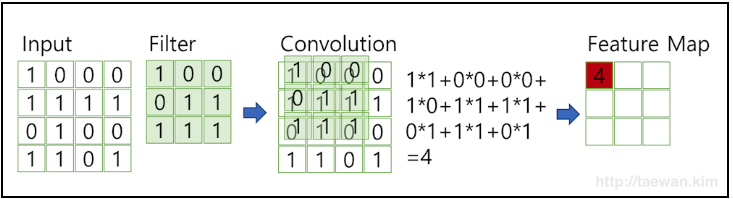

In [1]:
from IPython.display import Image
Image('./content/dl_data/cnn1.png', 
      width=400)
# 입력 이미지 x에 필터 W를 통과시켜서 특징이 추출된 Feature Map 산출과정
# 계산 : 단일 곱셉-누산(FMA, Fused Multiply-Add)
# 1*1 + 0*0 + ... + 0*1 = 4
# 아래 그림의 Input은 전체 데이터를 보여준것이 아니다

- 스트라이드 
    - 이미지를 조금씩 자르기 위해서, 필터를 움직인다. 그 움직이는 크기를 stride 라고 한다 
    - 필터 : 이미지의 특징을 찾아내기 위한 공용 파라미터(= 커널)
        - 공용 파라미터 값은 W(가중치) 
    - 스트라이드 
        - 필터가 순회하는 간격 
        - 커널이 움직이는 크기 

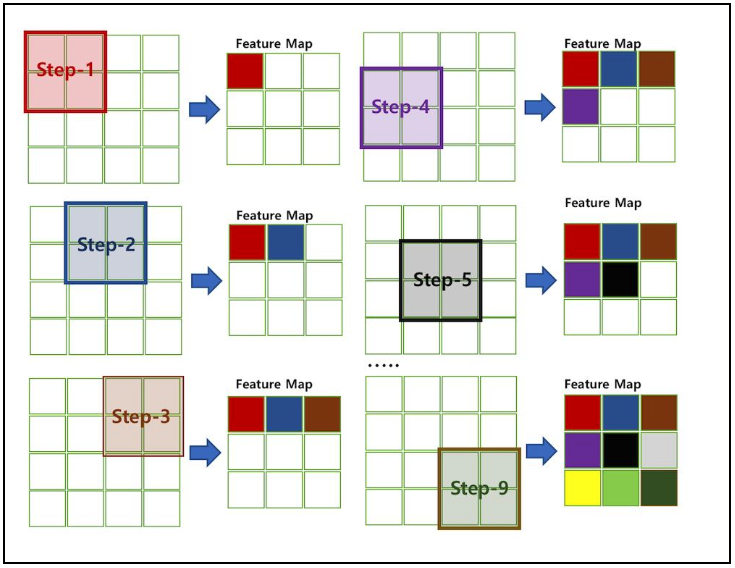

In [2]:
from IPython.display import Image
Image('./content/dl_data/cnn2.png', 
      width=400)
# 커널의 스트라이드 과정을 보여준다
# x축으로 이동하고, 끝에 도달하면, y축으로 s값 만큼 이동후 x축으로 이동

- 필터, 커널 등을 사용하는 이유
    - 입력 이미지가 28x28 이었다 
    - 머신러닝에서 feature 를 생각해 보면, 784개가 나왔다 
    - 이것을 딥러닝에 그냥 적용해 본다면 784개의 가중치가 필요하게 된다 !! => 연산량이 너무 많다
    - 그래서, 필터 3x3 이라면, 가중치 값은 몇개만 > 9개만 있으면 되고 => 계산량을 압도적으로 줄여주고, 학습속도를 향상 => 비용을 절약하게 되고, 효율적,생산성 향상까지 얻게 된다 

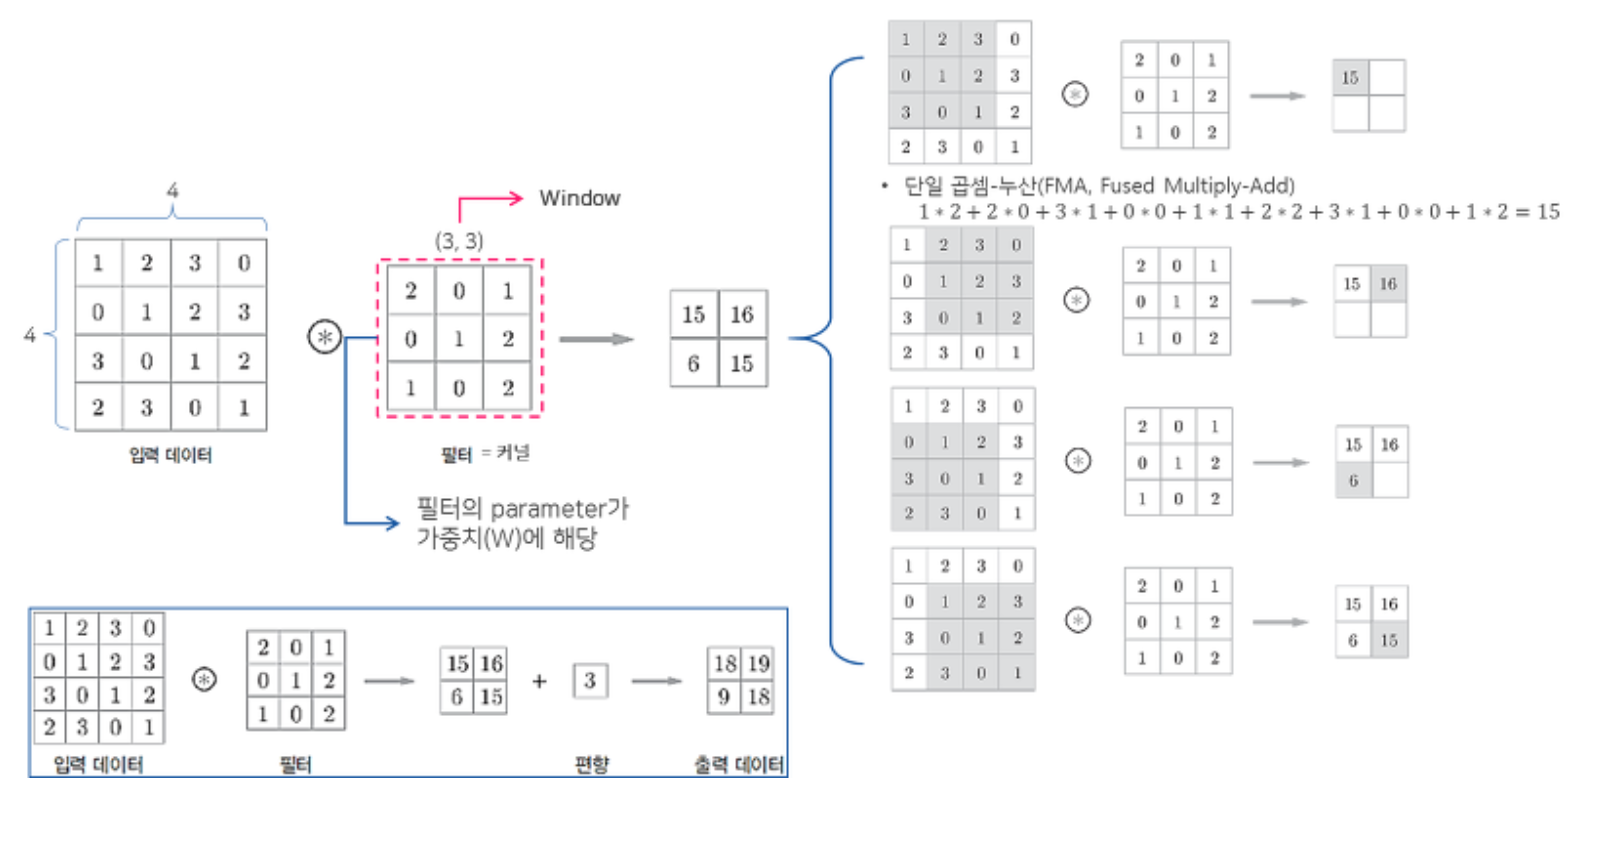

In [4]:
Image('./content/dl_data/dp1.png', width=600)

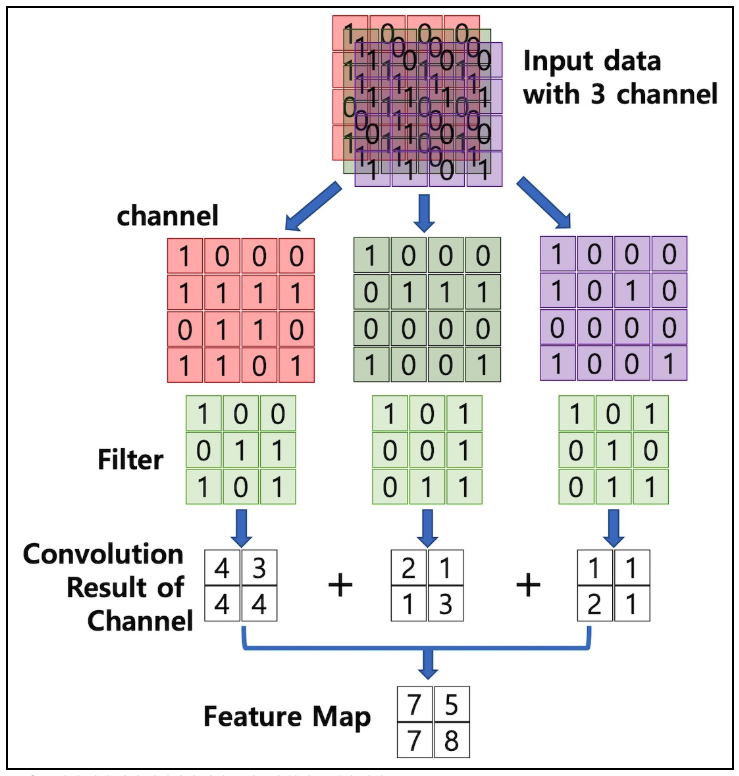

In [5]:
Image('./content/dl_data/cnn3.png', width=600)
# 이미지가 칼라이미지여서, 3 channel 인 경우 -> Feature Map 으로 수렴 

- padding(패딩) 
    - Feature Map 은 입력데이터보다 통상 작은 shape 이다 
    - 여러 층을 통과하다 보면 계속 줄어들게 되고, 그러다 보면 어느 순간 크기가 온전해지지 않을 수 있다 
    - 이런 경우, 외곽선을 특정 값(0)으로 채워서 크기를 보정하는 과정 
    - 바깥쪽은 0으로, 실제값은 안쪽으로 몰리게 된다(이런 특징을 가짐) 
    - 외곽선을 효율적으로 인식하게 하는 학습효과를 얻을 수 있다 

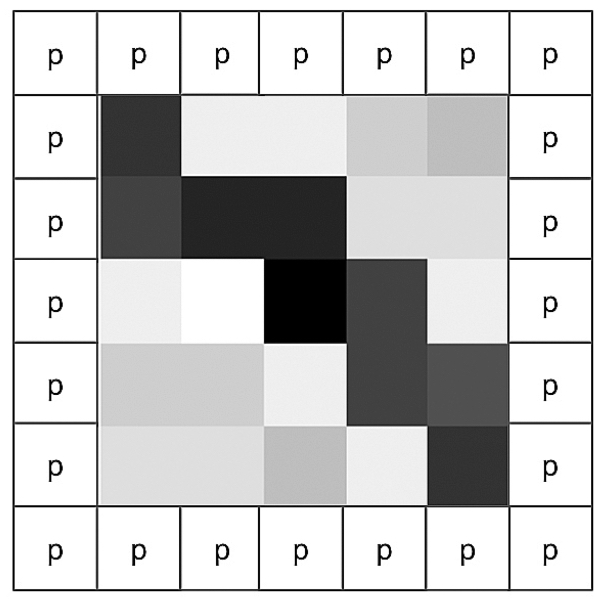

In [8]:
Image('./content/dl_data/cnn4.jpg', width=300)

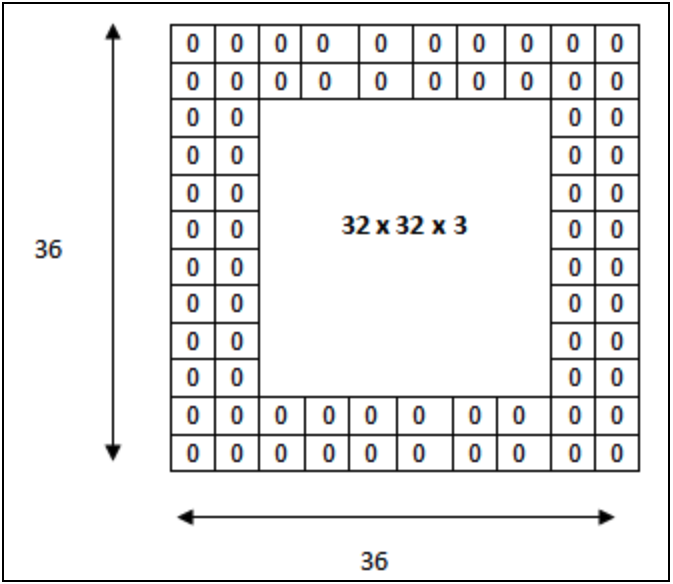

In [10]:
Image('./content/dl_data/cnn5.png', width=300)

- 편향(바이어스) 
    - 여기서는 일단 설명은 생략 

## 합성곱층의 결과물 

- 특성을 가진 맵
- Feature Map 
    - 합성곱층의 계산을 통해서 만들어진 행렬 
    - Feature Map을layers 를 깊게 만들기 위해서, 비선형으로 처리해 버린다면 
      => 활성화 함수(sigmod, relu, ...)를 통과시킨다면 -> Actication Map이라고 한다 
- Actication Map 
    - Feature Map 이 활성화 함수를 통과해서 나온 결과물 
- 최종 결과물 
    - Feature Map 
    or
    - Actication Map(통상적인 결과물) 

# 풀링층(Pooling Layer) 

- 이미지의 특징을 강화한다 
- 합성곱층의 출력인 특징맵(활성화맵) => C
- C를 결론적으로 축소 혹은 유지하는 층(shape의 크기, 차원은 유지) 
- 축소라면 
    - 특징을 유지한 채로 축소를 하므로, 위치변경이나 결과의 변화는 방지된다
    - 예) 
        - 직선이 미세하게 흐트러지지만, 직선이라는 인식은 유지된다 
- 종류 
    - 최대 풀링(단위에서 최대값을 취한다) 
    - 최소 풀링
    - 평균 풀링 
- 특징
    - 공용 파라미터가 없다 -> W가 없다 -> 필터가 없다 
    - 해당 풀링을 통과하면 통상 크기가 감소 
    - 채널(입력된 이미지 수)의 수는 변화가 없다  

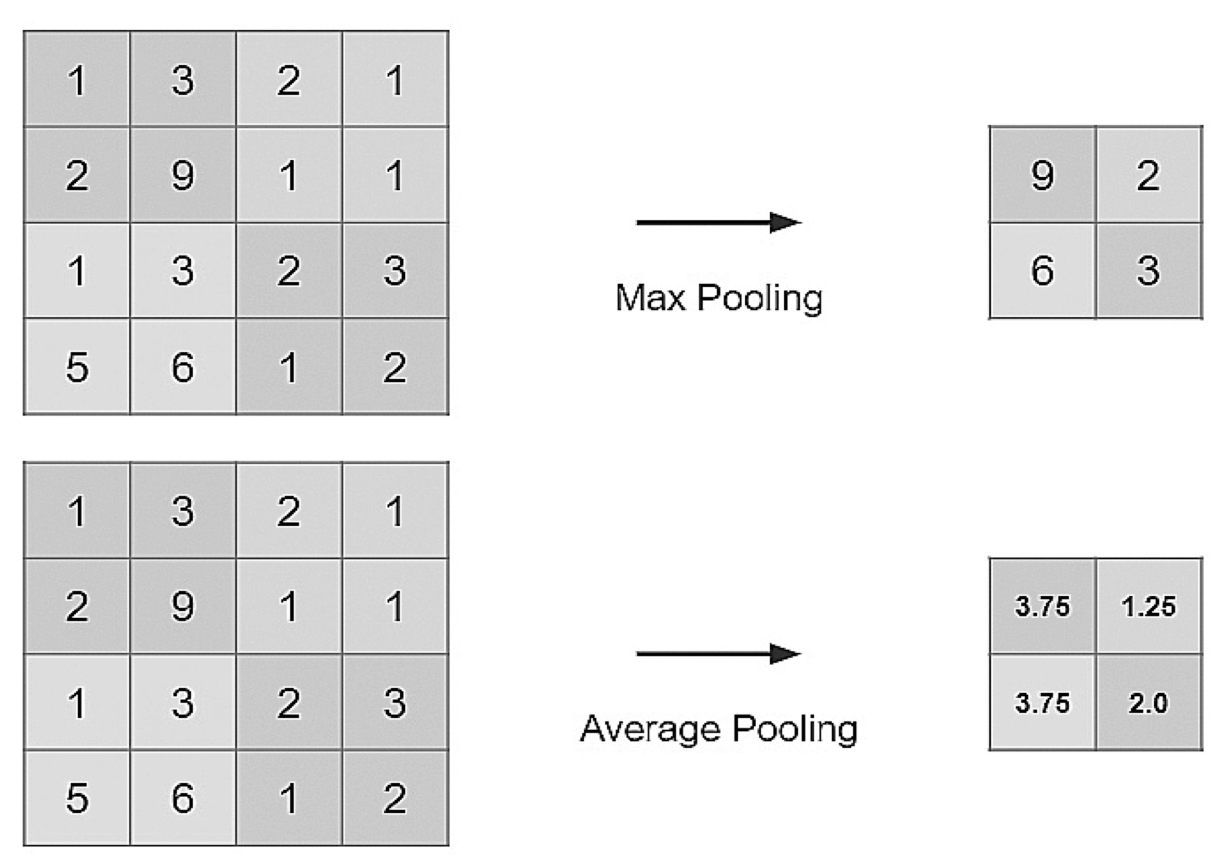

In [13]:
Image('./content/dl_data/cnn6.jpg', width=300)

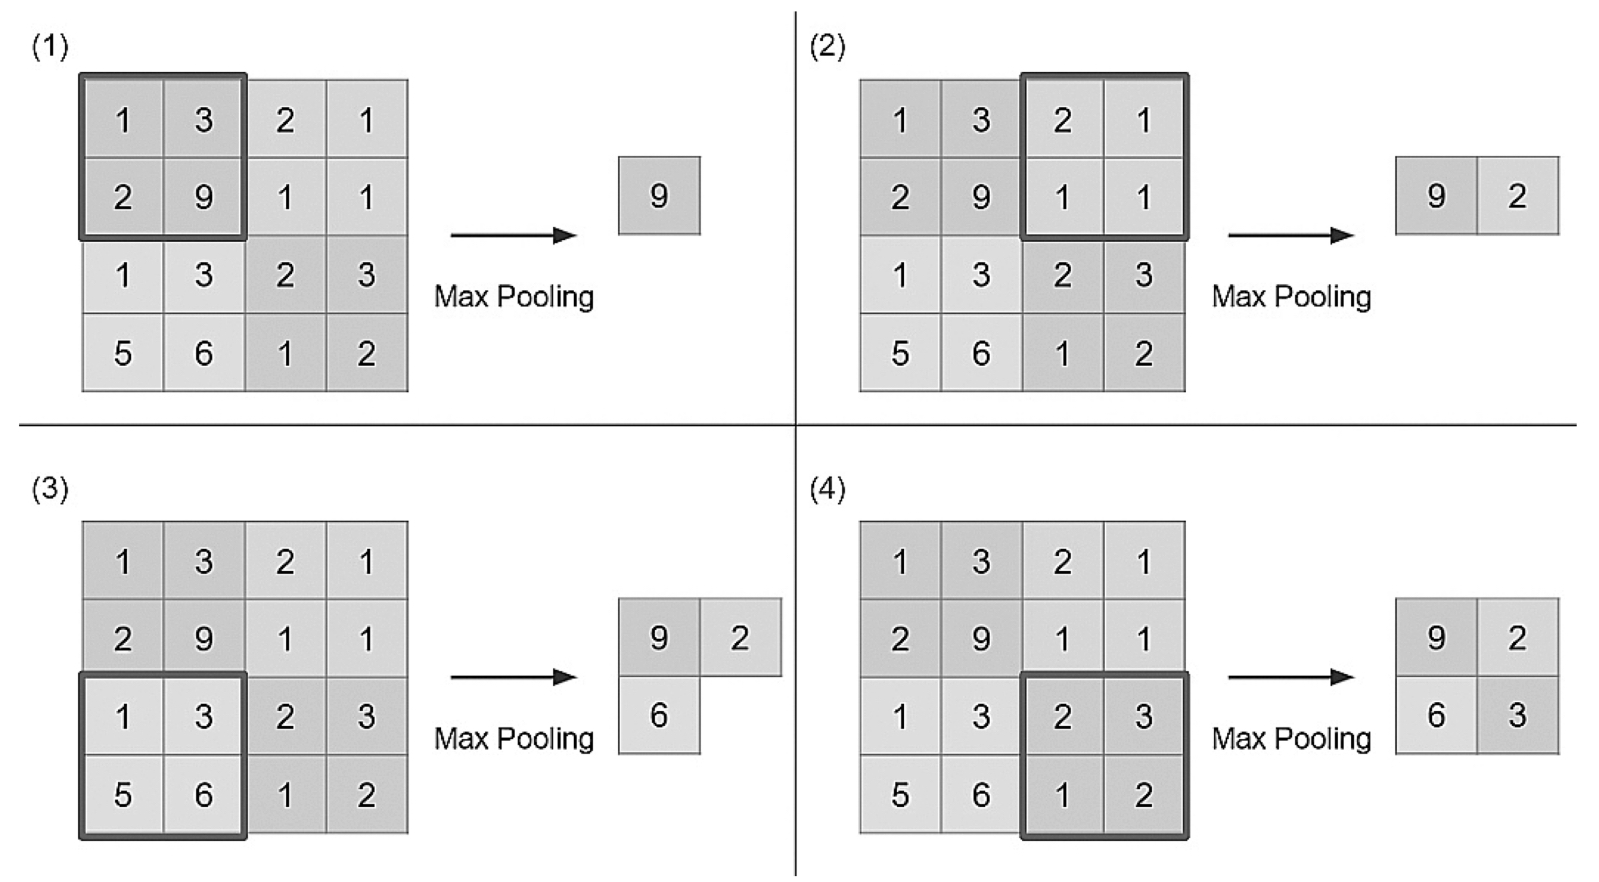

In [19]:
Image('./content/dl_data/cnn7.jpg', width=500)

# 전결합층 ( Fully connected Layer )  

- 전결합층에 도착한 특징맵(Feature Map)을 1차원으로 전개시킨다 
- Flatten(n차 행렬을 1차 행렬로 펴준다) 
- 활성화 함수를 사용하면 특성을 더욱더 강조할 수 있다 

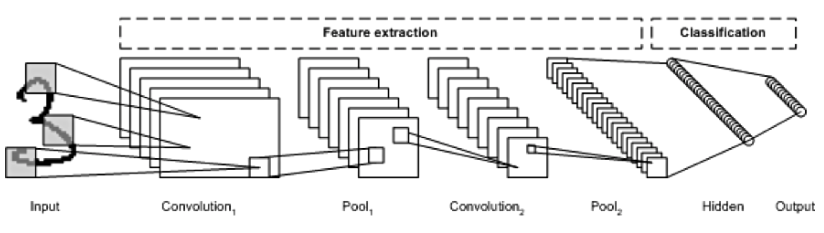

In [18]:
Image('./content/dl_data/cnn8.png', width=600)

# 드롭아웃층 (Dropout Layer) 

- 끝에 나올 수도 있고, 중간에 나올 수도 있다 
- 과적합을 방지하기 위한 조치 
- 원리 
    - 인공신경망이 학습 중일 때, 랜덤하게 "신경꺼 : 신경망을 꺼서" 학습을 방해한다 
    - 학습이 학습용 데이터에 치우친다/길들여진다 라는 현상을 방지함에 있다 
- 어느 층에서도 사용이 가능하다 

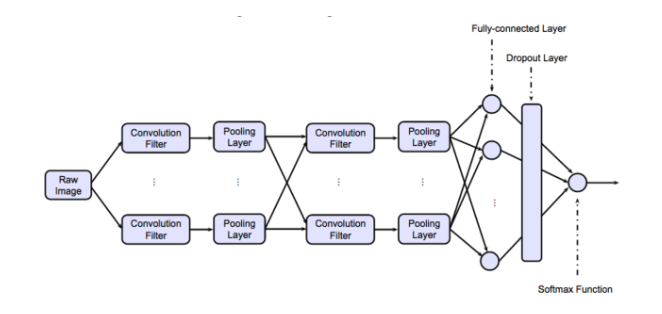

In [20]:
Image('./content/dl_data/cnn9.png', width=600)